# ICRANet-ISFAHAN Astronomy Meeting (Hands on Workshop) 

Here is the final answer to the task that was prepared for attendants.

In the next question, which you are going to solve by yourself, you should look at whether there is a difference in the accuracy of the decision trees between QSOs and regular galaxies. Additionally, try to find the best fraction of split and test data. For more datasets of SDSS or enhanced algorithms of Decision Trees and Random Forests, you can clone this repository: https://github.com/Perun21/GRB

# QSO and Galaxy

Write a function split_galaxies_qsos that splits our data containing both galaxies and QSOs into two arrays that contain only galaxies and QSOs respectively. Your function should take a single data argument.

The function should return two NumPy arrays, the first galaxies containing only rows from data that are galaxies and the second qsos containing only rows that are QSOs.

The data array contains a column data['spec_class'] where the values will either be b'GALAXY' or b'QSO'.

The spectral class is stored as a byte string (not Unicode strings), so the literals must have a b out the front. Comparing against 'GALAXY' will not match any rows, whereas b'GALAXY' will.

We can use masking to select particular rows:

In [ ]:
import numpy as np
data = np.load('F:\Online Courses\Data-driven Astronomy\WEEK 5\Python practice\sdss_galaxy_colors.npy')
galaxies = data[data['spec_class'] == b'GALAXY']

The inner data['spec_class'] == b'GALAXY' returns all of the indices that have a galaxy spectral type. These indices are then used to select the rows with the outer data[...].

This solution uses masking.

In [ ]:
qso_mask = data['spec_class'] == b'QSO'

In [ ]:
Creates an array of boolean values True if the data['spec_class'] == b'QSO' and False otherwise.

We do the same for the galaxies and then create our two return arrays using the masks.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# paste your cross_validate_model function here
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  diffs = []

  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
    
    # predict using the model
    predictions = model.predict(test_features)
 
    # calculate the median_diff from predicted values and append to results array
    diffs.append(median_diff(predictions, test_targets))
 
  # return the list with your median difference values
  return diffs

# complete this function
def split_galaxies_qsos(data):
  # split the data into galaxies and qsos arrays
  galaxies = data[data['spec_class'] == b'GALAXY']
  qsos = data[data['spec_class'] == b'QSO']

  # return the seperated galaxies and qsos arrays
  return galaxies, qsos

def cross_validate_median_diff(data):
  features, targets = get_features_targets(data)
  dtr = DecisionTreeRegressor(max_depth=19)
  return np.mean(cross_validate_model(dtr, features, targets, 10))

if __name__ == "__main__":
  data = np.load('File location\sdss_galaxy_colors.npy')

  # split the data set into galaxies and QSOs
  galaxies, qsos= split_galaxies_qsos(data)

  # here we cross validate the model and get the cross-validated median difference
  # the cross_validated_med_diff function is in "written_functions"
  galaxy_med_diff = cross_validate_median_diff(galaxies)
  qso_med_diff = cross_validate_median_diff(qsos)

  # print the results
  print("Median difference for Galaxies: {:.3f}".format(galaxy_med_diff))
  print("Median difference for QSOs: {:.3f}".format(qso_med_diff))

# QSO Discussion

So our QSOs have a greater median residual (≈0.074) than the galaxies (≈0.016). There are a couple of possibilities why this is the case.

There are far fewer QSOs (8525) than galaxies (41,475).

Galaxies aren't as bright as QSOs so they become too faint to be detected with SDSS at redshifts≈0.4. This creates a measurement bias.

When we take a random sample of galaxies the same size as the QSO data set we get a med_diff of ≈0.018 which is slightly higher than the full set, but not enough to account for the gap between the two populations.

The figure below shows the normalised distribution function of the two populations.

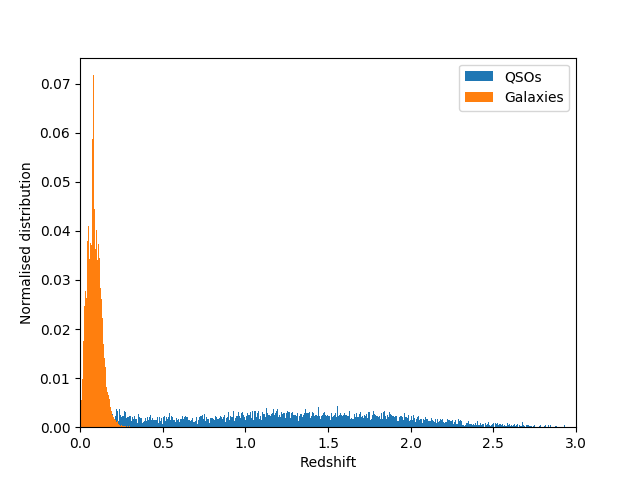

We can see that the majority of galaxies form a peak around 0.10 while the QSOs are resonably evenly distributed out to redshift≈2.5. This can lead to a measurement bias. In the case of the galaxies we have trained our decision tree with target redshifts approximately less than 0.4. As such the predictions from this model will not be larger than the maximum target value. So the maximum difference (or residual) for each galaxy in this set will be a lot smaller than the maximum residual for the QSOs.

We can often get a clearer view of this by looking at the predicted redshifts vs actual redshifts in a plot.

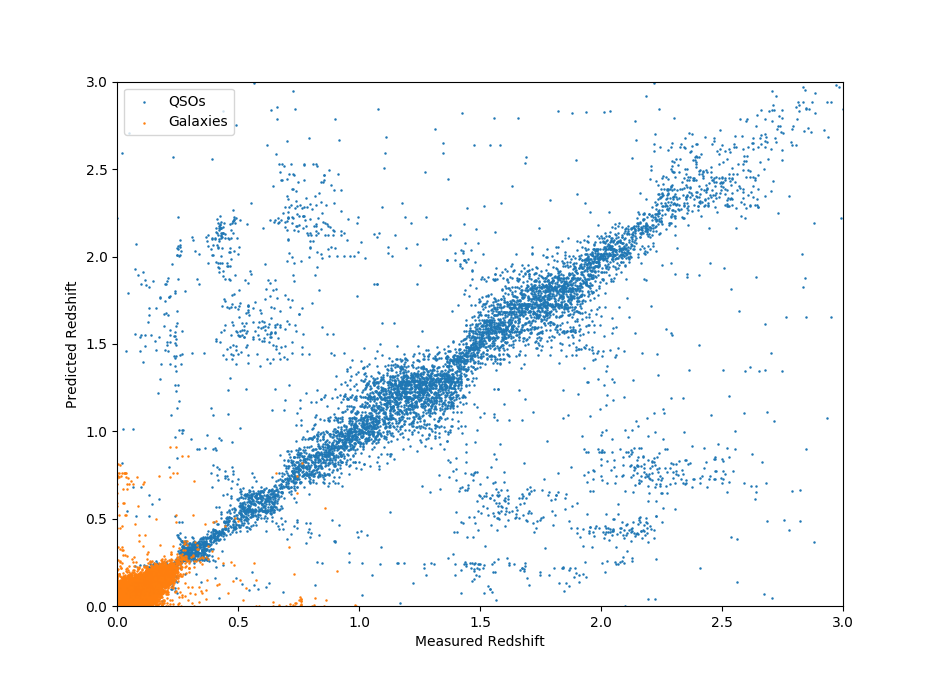

Next, we will determine the optimal fraction of test and train data. Machine learning approaches to data analysis often take 80% of the data for training and 20% for testing. We can, however, obtain the number that is optimum for our case by including a simple loop.

The Data Science team of the ICRANet-Isfahan astronomy meeting kindly appreciates your attendance at the Hands-on workshop.